# Projet STATISTIQUES - Étude de données météo - Notebook de Paul

Groupe : Choquet Laura, Oncle Valentin, Laisné Paul, Maubian Joséphine, Regaieg Mohamed

## Exploration et présentation des données

Les données utilisées dans ce projet sont des données météorologiques provenant de la source suivante : 
https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/donnees-synop-essentielles-omm/exports/csv?lang=fr&qv1=(date%3A%5B2015-08-03T22%3A00%3A00Z%20TO%202025-09-03T21%3A59%3A59Z%5D)&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B


In [ ]:
# Chargement des données d'observations

global_data <- read.csv("../data/observations.csv", sep = ",") # Remplacer par le chemin correct


In [ ]:
# Informations générales sur le jeu global des observations

cat(strrep("-", 50), "\n")
cat("Dimension du dataset\n")
cat(strrep("-", 50), "\n")
dim_data <- dim(global_data)
cat("Nb d'observations :", dim_data[1], "\n")
cat("Nb de variables :", dim_data[2], "\n")

-------------------------------------------------- 
Dimension du dataset
-------------------------------------------------- 
Nb d'observations : 1719567 
Nb de variables : 66 


-------------------------------------------------- 
Analyse des données manquantes (en pourcentage)
-------------------------------------------------- 
                                           ID.OMM.station 
                                                    0.000 
                                                     Date 
                                                    0.000 
                                   Pression.au.niveau.mer 
                                                    5.488 
                        Variation.de.pression.en.3.heures 
                                                    2.367 
                            Type.de.tendance.barométrique 
                                                    3.968 
                            Direction.du.vent.moyen.10.mn 
                                                    0.863 
                              Vitesse.du.vent.moyen.10.mn 
                                                    0.845 
                      

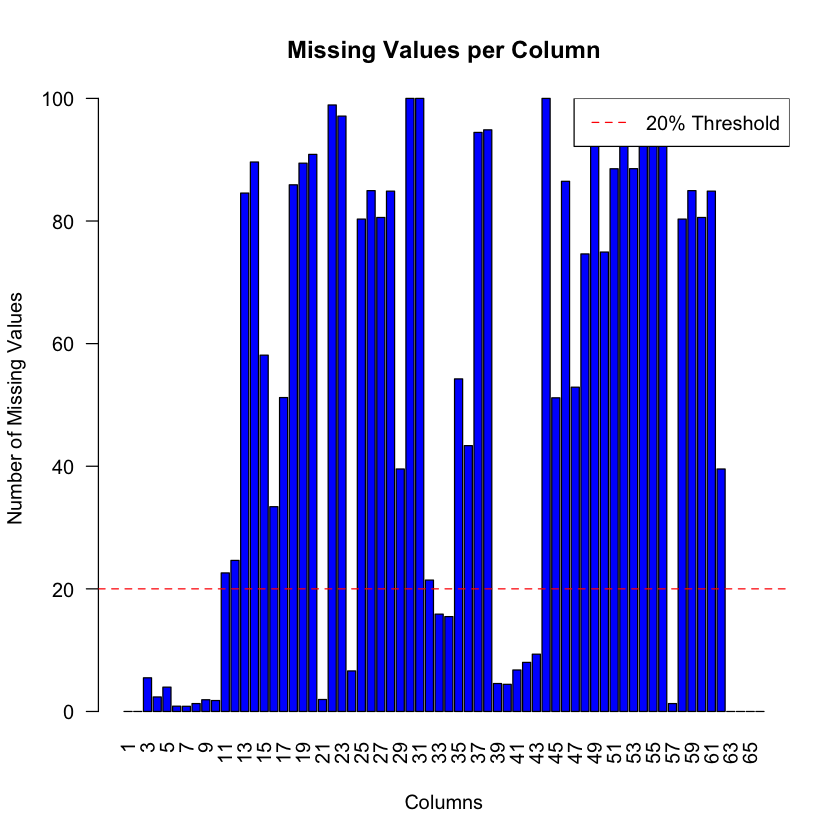

In [28]:
# Analyse des données manquantes (en pourcentage)
missing_values_percent <- colMeans(is.na(global_data)) * 100
cat(strrep("-", 50), "\n")
cat("Analyse des données manquantes (en pourcentage)\n")
cat(strrep("-", 50), "\n")
print(round(missing_values_percent, 3))

# Affichage dans un histogramme des valeurs manquantes par colonne
par(bg = "white")
barplot(missing_values_percent, main = "Missing Values per Column", 
        xlab = "Columns", ylab = "Number of Missing Values", col = "blue", las = 2,
        names.arg = seq_along(missing_values_percent))
# Rajouter une ligne horizontale pour indiquer un seuil de tolérance
abline(h = 20, col = "red", lty = 2)
legend("topright", legend = "20% Threshold", col = "red", lty = 2)

Remarque : Le jeu de données contient un nombre important de colonnes, mais beaucoup d'entre elles sont peu remplies. Certaines variables ont un taux de données manquantes très élevé (de 80 à 100 %). Et une grande majorité a un taux supérieur à 30 % ce qui limitent grandement leur utilisation dans des modèles statistiques.

## Régression PLS

Pour cette partie, on va s'intéresser à une seule station en particulier. On isolera donc les observations de la station 7005 (Abbeville).

In [1]:
# Chargement du jeu de données
data <- read.csv("../data/station_7005_obs.csv", sep = ",") # Remplacer le lien par celui de votre jeu de données.

In [2]:
# Informations générales 
cat(strrep("-", 50), "\n")
cat("Dimension du dataset\n")
cat(strrep("-", 50), "\n")
dim_data <- dim(data)
cat("Nb d'observations :", dim_data[1], "\n")
cat("Nb de variables :", dim_data[2], "\n")

-------------------------------------------------- 
Dimension du dataset
-------------------------------------------------- 
Nb d'observations : 29191 
Nb de variables : 62 


In [3]:
# Liste des variables

cat(strrep("-", 50), "\n")
cat("Liste des variables :\n")
cat(strrep("-", 50), "\n")
print(names(data))

-------------------------------------------------- 
Liste des variables :
-------------------------------------------------- 
 [1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                                   
[12] "Temps.présent"                                            
[13] "Temps.passé.1"                                            
[14] "Temps.passé.2"         

In [4]:
# Summary of the dataset

cat(strrep("-", 50), "\n")
cat("Summary of the dataset\n")
cat(strrep("-", 50), "\n")
print(summary(data))

-------------------------------------------------- 
Summary of the dataset
-------------------------------------------------- 
 ID.OMM.station     Date           Pression.au.niveau.mer
 Min.   :7005   Length:29191       Min.   : 96820        
 1st Qu.:7005   Class :character   1st Qu.:101100        
 Median :7005   Mode  :character   Median :101740        
 Mean   :7005                      Mean   :101652        
 3rd Qu.:7005                      3rd Qu.:102310        
 Max.   :7005                      Max.   :104940        
                                   NA's   :12            
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-1.140e+03                Min.   :0.000                
 1st Qu.:-7.000e+01                1st Qu.:2.000                
 Median : 0.000e+00                Median :4.000                
 Mean   :-3.051e-02                Mean   :4.335                
 3rd Qu.: 7.000e+01                3rd Qu.:7.000                
 Max.   : 1.030e+03

-------------------------------------------------- 
Analyse des données manquantes (en pourcentage)
-------------------------------------------------- 
                                           ID.OMM.station 
                                                    0.000 
                                                     Date 
                                                    0.000 
                                   Pression.au.niveau.mer 
                                                    0.041 
                        Variation.de.pression.en.3.heures 
                                                    0.055 
                            Type.de.tendance.barométrique 
                                                    0.055 
                            Direction.du.vent.moyen.10.mn 
                                                    0.130 
                              Vitesse.du.vent.moyen.10.mn 
                                                    0.130 
                      

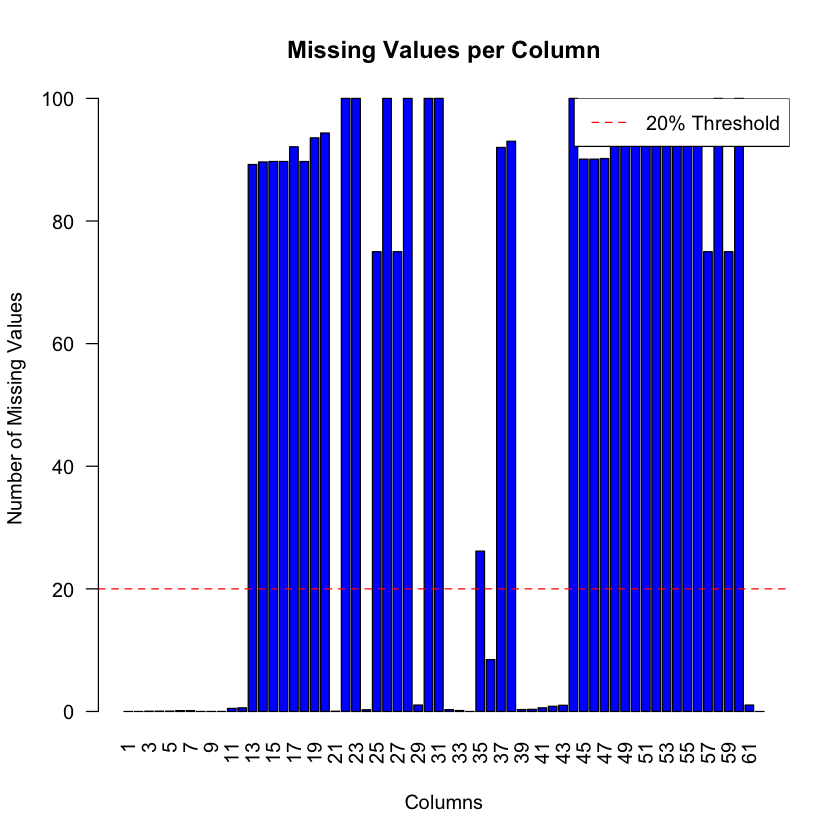

In [5]:
# Analyse des données manquantes (en pourcentage)
missing_values_percent <- colMeans(is.na(data)) * 100
cat(strrep("-", 50), "\n")
cat("Analyse des données manquantes (en pourcentage)\n")
cat(strrep("-", 50), "\n")
print(round(missing_values_percent, 3))

# Affichage dans un histogramme des valeurs manquantes par colonne
par(bg = "white")
barplot(missing_values_percent, main = "Missing Values per Column", 
        xlab = "Columns", ylab = "Number of Missing Values", col = "blue", las = 2,
        names.arg = seq_along(missing_values_percent))
# Rajouter une ligne horizontale pour indiquer un seuil de tolérance
abline(h = 20, col = "red", lty = 2)
legend("topright", legend = "20% Threshold", col = "red", lty = 2)


Afin d'avoir une meilleure visibilité sur le jeu de données et de réduire le nombre de variables sur lesquelles nous allons travaillé, nous avons d'abord écarté les variables non exploitables qui contiennent plus de 20 % de données manquantes.

In [6]:
# Suppression de colonnes avec plus de 20% de données manquantes
threshold_ratio <- 0.2
threshold <- threshold_ratio * nrow(data)
missing_values <- colSums(is.na(data))
columns_to_drop <- names(missing_values[missing_values > threshold])
data_cleaned <- data[, !(names(data) %in% columns_to_drop)]
cat(strrep("-", 50), "\n")
cat("Dimension du dataset après suppression des colonnes :\n")
cat(strrep("-", 50), "\n")
dim_data_cleaned <- dim(data_cleaned)
cat("Nb d'observations :", dim_data_cleaned[1], "\n")
cat("Nb de variables :", dim_data_cleaned[2], "\n")
cat(strrep("-", 50), "\n")
cat("Liste des variables après nettoyage :\n")
print(names(data_cleaned))

-------------------------------------------------- 
Dimension du dataset après suppression des colonnes :
-------------------------------------------------- 
Nb d'observations : 29191 
Nb de variables : 26 
-------------------------------------------------- 
Liste des variables après nettoyage :
 [1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                        

In [7]:
# Récupération des variables numériques
# On considère les variables date, ID.OMM.station, mois de l'année comme catégorielle.
categorical_var = c("Date", "ID.OMM.station", "mois_de_l_annee")
data_numeric <- data_cleaned[, !(names(data_cleaned) %in% categorical_var)]

cat(strrep("-", 50), "\n")
cat("Variables numériques :\n")
cat(strrep("-", 50), "\n")
cat("Nb de variables :", length(names(data_numeric)), "\n")
print(names(data_numeric))
cat(strrep("-", 50), "\n")


-------------------------------------------------- 
Variables numériques :
-------------------------------------------------- 


Nb de variables : 23 
 [1] "Pression.au.niveau.mer"                                   
 [2] "Variation.de.pression.en.3.heures"                        
 [3] "Type.de.tendance.barométrique"                            
 [4] "Direction.du.vent.moyen.10.mn"                            
 [5] "Vitesse.du.vent.moyen.10.mn"                              
 [6] "Température"                                              
 [7] "Point.de.rosée"                                           
 [8] "Humidité"                                                 
 [9] "Visibilité.horizontale"                                   
[10] "Temps.présent"                                            
[11] "Pression.station"                                         
[12] "Variation.de.pression.en.24.heures"                       
[13] "Température.minimale.du.sol.sur.12.heures"                
[14] "Rafale.sur.les.10.dernières.minutes"                      
[15] "Rafales.sur.une.période"                                  
[16

On réalise une analyse de corrélation entre les variables pour pouvoir écarter les variables redondantes de notre modèle.

In [8]:
library(corrplot)

corrplot 0.95 loaded



Indices et noms des colonnes :


1 : Pression.au.niveau.mer 
2 : Variation.de.pression.en.3.heures 
3 : Type.de.tendance.barométrique 
4 : Direction.du.vent.moyen.10.mn 
5 : Vitesse.du.vent.moyen.10.mn 
6 : Température 
7 : Point.de.rosée 
8 : Humidité 
9 : Visibilité.horizontale 
10 : Temps.présent 
11 : Pression.station 
12 : Variation.de.pression.en.24.heures 
13 : Température.minimale.du.sol.sur.12.heures 
14 : Rafale.sur.les.10.dernières.minutes 
15 : Rafales.sur.une.période 
16 : Periode.de.mesure.de.la.rafale 
17 : Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol 
18 : Précipitations.dans.la.dernière.heure 
19 : Précipitations.dans.les.3.dernières.heures 
20 : Précipitations.dans.les.6.dernières.heures 
21 : Précipitations.dans.les.12.dernières.heures 
22 : Précipitations.dans.les.24.dernières.heures 
23 : Température.minimale.du.sol.sur.12.heures..en..C. 


Warning message in cor(data_numeric, use = "pairwise.complete.obs"):
“l'écart type est nul”


-------------------------------------------------- 
10 paires de variables les plus corrélées :
-------------------------------------------------- 
1. Température.minimale.du.sol.sur.12.heures et Température.minimale.du.sol.sur.12.heures..en..C. : 1
2. Pression.au.niveau.mer et Pression.station : 1
3. Rafale.sur.les.10.dernières.minutes et Rafales.sur.une.période : 0.962
4. Vitesse.du.vent.moyen.10.mn et Rafale.sur.les.10.dernières.minutes : 0.936
5. Vitesse.du.vent.moyen.10.mn et Rafales.sur.une.période : 0.899
6. Point.de.rosée et Température.minimale.du.sol.sur.12.heures..en..C. : 0.891
7. Point.de.rosée et Température.minimale.du.sol.sur.12.heures : 0.891
8. Température et Point.de.rosée : 0.843
9. Température et Température.minimale.du.sol.sur.12.heures : 0.829
10. Température et Température.minimale.du.sol.sur.12.heures..en..C. : 0.829
-------------------------------------------------- 


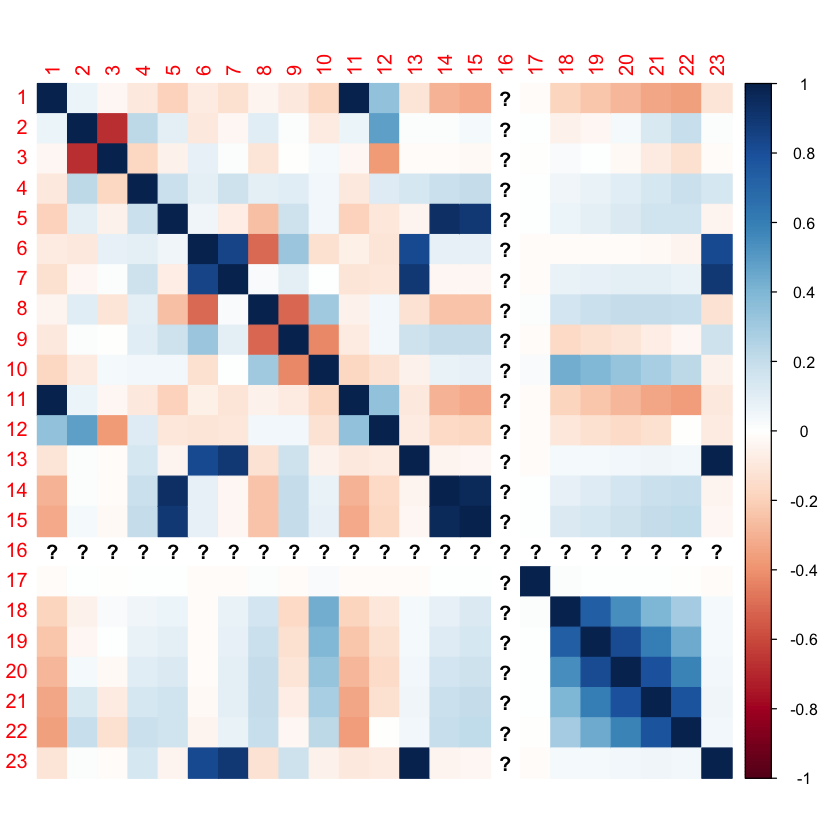

In [9]:
# Affichage graphique de la matrice de corrélation
# Afficher les indices et les noms des colonnes
cat("Indices et noms des colonnes :\n")
for (i in seq_along(names(data_numeric))) {
    cat(i, ":", names(data_numeric)[i], "\n")
}
# Remplacer les noms des colonnes par leurs indices dans la matrice de corrélation

par(bg = "white")

cor_matrix <- cor(data_numeric, use = "pairwise.complete.obs")
colnames(cor_matrix) <- rownames(cor_matrix) <- seq_len(ncol(cor_matrix))
corrplot(cor_matrix, method = "color")

# Print les 5 paires de variables les plus corrélées
cor_matrix[lower.tri(cor_matrix, diag = TRUE)] <- NA
cor_values <- as.data.frame(as.table(cor_matrix))
cor_values <- na.omit(cor_values)
cor_values <- cor_values[order(-abs(cor_values$Freq)), ]
cat(strrep("-", 50), "\n")
cat("10 paires de variables les plus corrélées :\n")
cat(strrep("-", 50), "\n")
for (i in 1:10) {
    var1_index <- cor_values[i, 1]
    var2_index <- cor_values[i, 2]
    var1_name <- names(data_numeric)[as.numeric(var1_index)]
    var2_name <- names(data_numeric)[as.numeric(var2_index)]
    cat(paste0(i, ". ", var1_name, " et ", var2_name, " : ", round(cor_values[i, 3], 3), "\n"))
}
cat(strrep("-", 50), "\n")

Suite à cette étude de corrélation, on supprimera les colonnes suivantes : 
- Température.minimale.du.sol.sur.12.heures..en..C. (redondante avec la même variable en Kelvin)
- Pression.au.niveau.mer (redondante avec la pression station)
- Rafales.sur.une.période (redondante avec Rafales sur les 10 dernières minutes)
- Periode.de.mesure.de.la.rafale

La variable Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol étant constante à 0, on la retire également.

In [10]:
# Suppression des variables redondantes et inutiles - Température.minimale.du.sol.sur.12.heures..en..C. - Pression.au.niveau.mer - Rafales.sur.une.période - Periode.de.mesure.de.la.rafale

data_final <- data_numeric[, !(names(data_numeric) %in% c("Température.minimale.du.sol.sur.12.heures..en..C.", 
                                                              "Pression.au.niveau.mer", 
                                                              "Rafales.sur.une.période", 
                                                              "Periode.de.mesure.de.la.rafale",
                                                              "Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol"))]

In [12]:
length(names(data_final))

[1] 18

On réalise une régression PLS pour prédire la variable cible "Température" en utilisant les autres variables numériques restantes.

In [15]:
library(pls)

Data: 	X dimension: 28390 17 
	Y dimension: 28390 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           6.316    5.986    5.943    5.928    5.823    4.656     3.17
adjCV        6.316    5.986    5.943    5.928    5.823    4.672     3.17
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       1.553    1.302   0.7702    0.6014    0.5818    0.5807    0.5807
adjCV    1.553    1.302   0.7700    0.6014    0.5818    0.5807    0.5806
       14 comps  15 comps  16 comps  17 comps
CV       0.5806    0.5805    0.5805    0.5805
adjCV    0.5806    0.5805    0.5805    0.5805

TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X    97.02    98.78    99.96    99.97    99.99   100.00   100.00   100.00
y    10.18    11.47    11.91    15.02    45.28    74.82    93.96    95.75

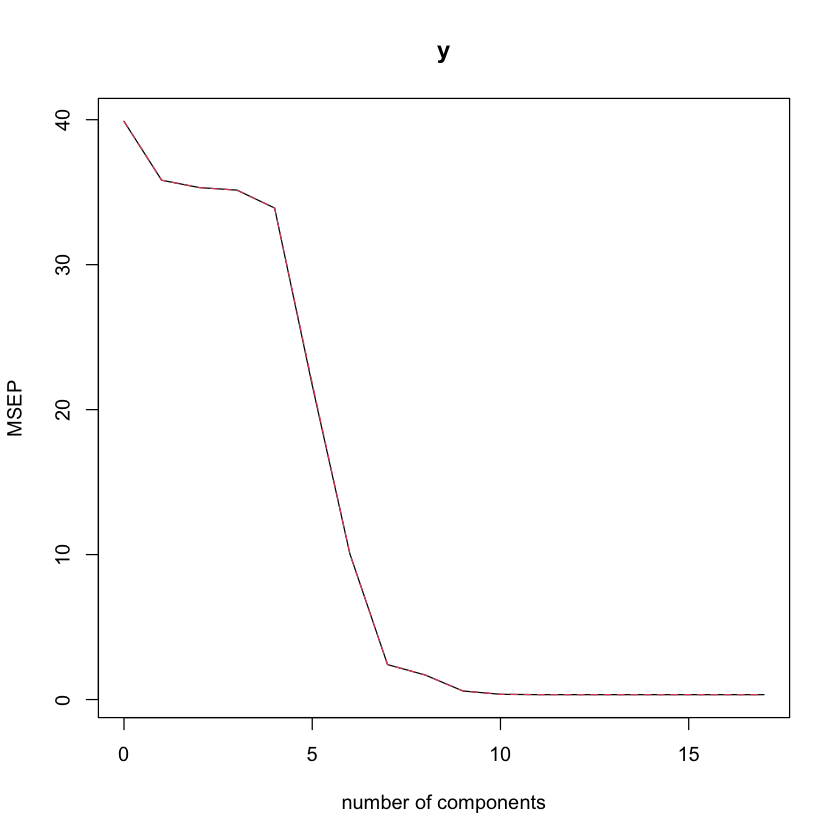

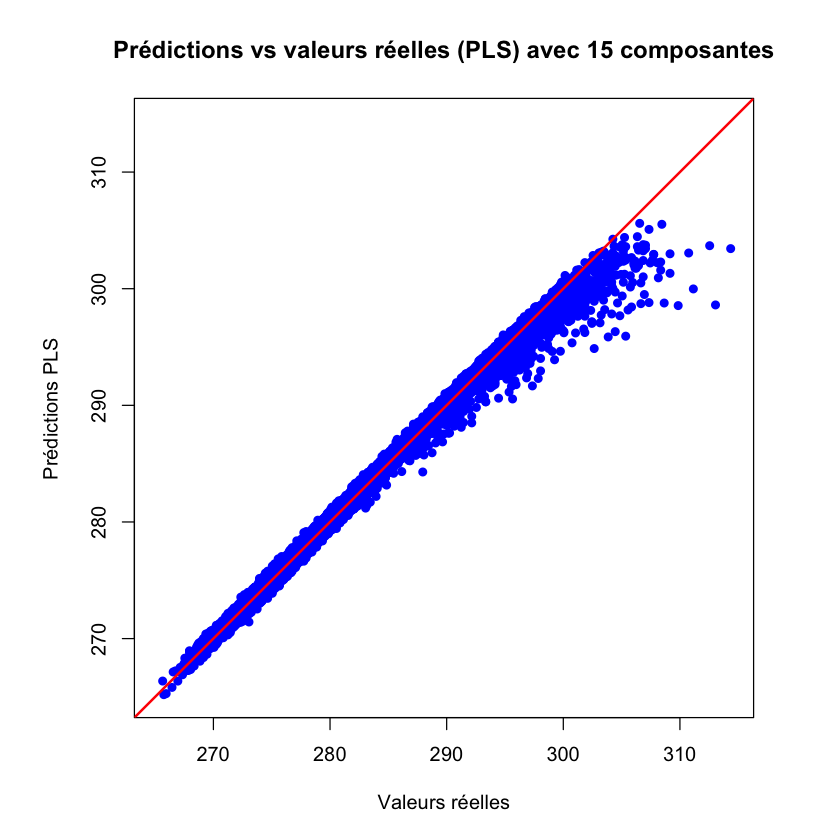

In [19]:
# Utiliser le nom exact de la variable cible
target_var <- "Température"


# Créer un data.frame avec toutes les variables nécessaires
df_pls <- data_final[, c(target_var, setdiff(names(data_final), target_var))]
df_pls <- na.omit(df_pls) # Retirer toutes les lignes avec NA

y <- df_pls[[target_var]]
X <- df_pls[, setdiff(names(df_pls), target_var), drop = FALSE]

# Régression PLS avec validation croisée
pls_model <- plsr(y ~ as.matrix(X), validation = "CV")

# Résumé du modèle
summary(pls_model)

# Sélection du nombre optimal de composantes
par(bg = 'white')
validationplot(pls_model, val.type = "MSEP")

# Trouver le nombre optimal de composantes
opt_ncomp <- which.min(pls_model$validation$PRESS)

cat("Nombre optimal de composantes :", opt_ncomp, "\n")
# Prédictions
pred <- predict(pls_model, ncomp = opt_ncomp)
pred_vec <- as.vector(pred[,1,1])

# Plot prédiction vs ground truth
par(pty = "s")
plot_lim <- range(c(y, pred_vec))
plot(y, pred_vec, 
     xlab = "Valeurs réelles", 
     ylab = "Prédictions PLS", 
     main = paste("Prédictions vs valeurs réelles (PLS) avec", opt_ncomp, "composantes"), 
     col = "blue", pch = 16,
     xlim = plot_lim, ylim = plot_lim)

abline(a = 0, b = 1, col = "red", lwd = 2)


#### Performance du modèle (mesurée avec la RMSEP)


- Baseline (Intercept) : RMSEP = 6.316°C

- Amélioration progressive jusqu'à 7 composantes :

    - 1-4 composantes : amélioration modeste (6.316 → 5.823)
    - 5-6 composantes : amélioration notable (5.823 → 3.171)
    - 7 composantes : saut majeur (3.171 → 1.553)
    - 8-9 composantes : encore une amélioration (1.553 → 0.771)
- Plateau optimal : À partir de 12 composantes

    RMSEP minimal ≈ 0.58°C 


#### Variance expliquée
- Variables prédictives (X) :

    97% dès la 1ère composante
    100% atteint à partir de la 6ème composante
- Variable cible (Y - Température) :

    Progression avec deux phases :
    - Phase 1 (1-4 comp.) : lente (10% → 15%)
    - Phase 2 (5-7 comp.) : explosive (15% → 45% → 75% → 94%)
    - Phase 3 (8+ comp.) : stabilisation à 99.16%

#### Qualité du modèle :

RMSEP de 0.58°C pour prédire la température
Modèle plutôt précis.
Points d'attention : potentiel dataleakage, variables redondantes ou variables donnant directement accès à la cible (point de rosée/température minimal du sol).


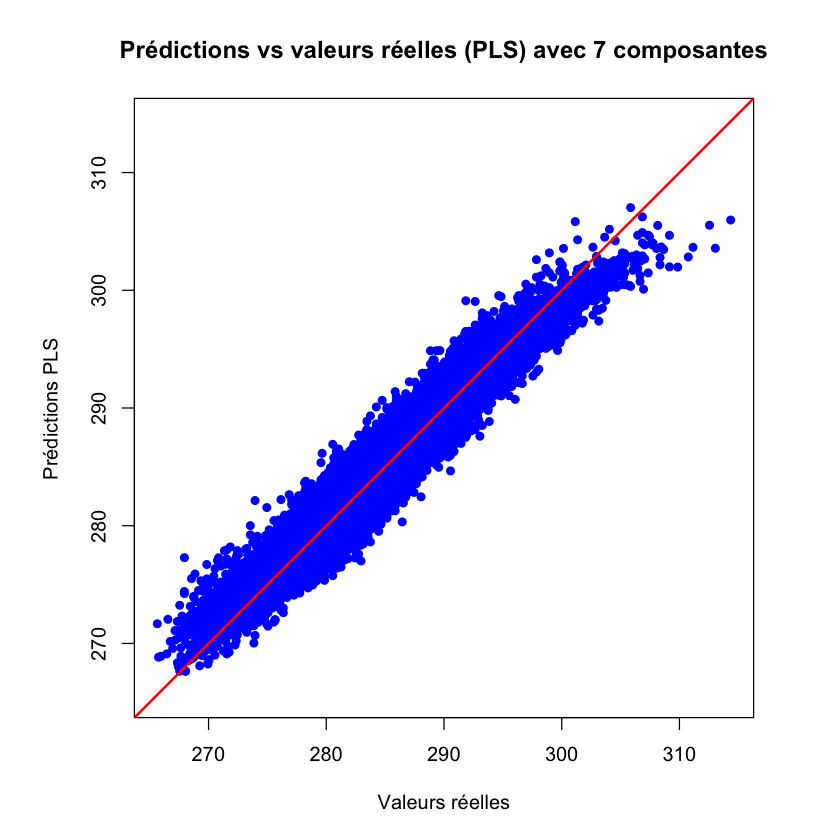

In [23]:
# Régression PLS avec 7 composantes

# Régression PLS avec validation croisée
pls_model <- plsr(y ~ as.matrix(X), validation = "CV")

# Prédictions
pred <- predict(pls_model, ncomp = 7)
pred_vec <- as.vector(pred[,1,1])

# Plot prédiction vs ground truth
par(pty = "s", bg = "white")
plot_lim <- range(c(y, pred_vec))
plot(y, pred_vec, 
     xlab = "Valeurs réelles", 
     ylab = "Prédictions PLS", 
     main = paste("Prédictions vs valeurs réelles (PLS) avec", 7, "composantes"), 
     col = "blue", pch = 16,
     xlim = plot_lim, ylim = plot_lim)

abline(a = 0, b = 1, col = "red", lwd = 2)
